[[73 73 70 70 69 68 71 70 72 75 78 73 65 67 71 75 76 78 77 77 73 72 64 62
  65 67 71 68 66 70 72 69 70 71 70 66 66 65 68 71 72 65 72 71 69 71 70 73
  75 71 75 74 74 69 66 64 64 64 61 61 66 56 56 59 64 71 61 61 61 58 59 59
  63 67 70 70 69 69 68 69 71 72 68 70 71 71 68 70 61 57 55 52 56 59 58 66
  70 66 71 71 69 62 56 53 62 66 48 45 52 58 62 58 58 61 67 59 52 51 54 61
  47 48 47 58 53 48 52 48 41 40 42 27 26 34 42 39 38 45 41 36 40 37 43 37
  34 37 42 42 42 37 44 40 43 40 42 40 50 41 40 36 31 32 35 32 22 24 23 25
  33 34 46 36 34 36 38 36 28 24 18 12 12 18 10  8 14 17 20 10  8  6 18 30
  26 35 37 20 15 16 24 23 20 26 37 42 36 36 28 24 28 35 42 34 26 19 33 18
  17 31 28 28 30 26 28 38 42 34 27 36 47 37 30 33 33 47 50 37 36 43 40 44
  40 42 43 36 38 35 35 34 34 34 31 33 34 33 34 32 34 32 29 30 34 31 32 33
  37 37 35 34 35 39 46 43 40 43 32 39 41 35 37 38 33 33 40 38 46 59 45 39
  40 40 39 40 38 41 46 45 46 50 53 49 51 48 44 50 65 70 68 61 54 56 54 54
  56 60 53 52 52 60 55 55 56 50 55 60 

/Users/g.siddharthareddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


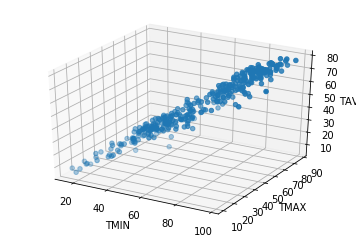

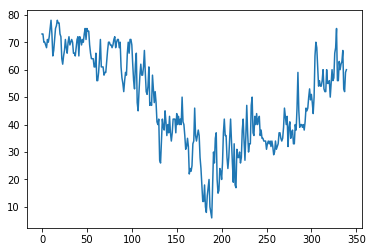

/Users/g.siddharthareddy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
 - 1s - loss: 0.4250 - mean_absolute_error: 0.6044
Epoch 2/10
 - 0s - loss: 0.3590 - mean_absolute_error: 0.5519
Epoch 3/10
 - 0s - loss: 0.3107 - mean_absolute_error: 0.5108
Epoch 4/10
 - 0s - loss: 0.2677 - mean_absolute_error: 0.4711
Epoch 5/10
 - 0s - loss: 0.2289 - mean_absolute_error: 0.4324
Epoch 6/10
 - 0s - loss: 0.1924 - mean_absolute_error: 0.3931
Epoch 7/10
 - 0s - loss: 0.1581 - mean_absolute_error: 0.3538
Epoch 8/10
 - 0s - loss: 0.1271 - mean_absolute_error: 0.3137
Epoch 9/10
 - 0s - loss: 0.1001 - mean_absolute_error: 0.2738
Epoch 10/10
 - 0s - loss: 0.0770 - mean_absolute_error: 0.2360


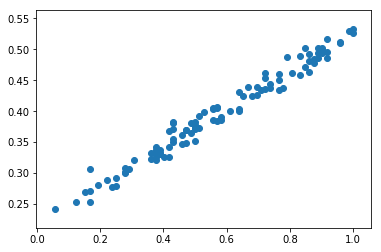

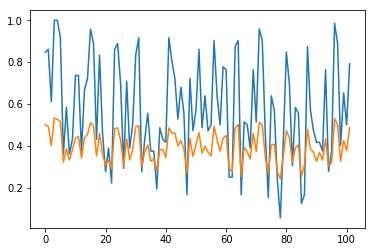

In [2]:
import numpy as np 
import pandas as pd 
 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics
 
df = pd.read_csv('NY.csv')
 
TAVG = np.array([df.ix[:,6]])
TMAX = np.array([df.ix[:,5]])
TMIN = np.array([df.ix[:,4]])
 
print(TAVG)
 
fig = plt.figure(1)
ax = fig.add_subplot(111,projection='3d')
 
ax.scatter(TMAX,TMIN,TAVG,marker= 'o')
ax.set_xlabel('TMIN')
ax.set_ylabel('TMAX')
ax.set_zlabel('TAVG')
plt.show()
 
plt.plot(TAVG[0,:])
plt.show()
 
X = np.concatenate([TMIN,TMAX],axis=0)
X = np.transpose(X)
 
Y = np.transpose(TAVG)
 
 
sc= MinMaxScaler()
sc.fit(X)
X=sc.transform(X)
 
sc1= MinMaxScaler()
sc1.fit(Y)
Y=sc1.transform(Y)
 
X = np.reshape(X,(X.shape[0],1,X.shape[1]))
 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)
 
model = Sequential()
 
model.add(LSTM(20,activation='tanh',input_shape=(1,2),recurrent_activation='hard_sigmoid'))
 
model.add(Dense(1))
 
model.compile(loss= 'mean_squared_error',optimizer= 'rmsprop',metrics=[metrics.mae])
 
model.fit(X_train,Y_train,epochs=10,verbose= 2)
 
predict =model.predict(X_test)
 
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)
 
plt.figure(3)
Real = plt.plot(Y_test)
Predict = plt.plot(predict)
plt.show()